## Handling un_balanced Data

In [2]:
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np
import pandas            as pd
import os

from imblearn.over_sampling          import SMOTE, ADASYN
from imblearn.under_sampling         import RandomUnderSampler
from mlflow.models.signature         import infer_signature
from imblearn.combine                import SMOTEENN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble                import RandomForestClassifier
from sklearn.model_selection         import train_test_split
from sklearn.metrics                 import *

In [3]:
df = pd.read_csv('preprocessed_corpus.csv')
df.head()

,raw_comment,category,word_count_raw,char_count_raw,num_unique_words,num_upper_words,num_punctuation_raw,cleaned_comment,num_stop_words,processed_comment,final_word_count,final_char_count
0,family mormon have never tried explain them t...,1,39,261,34,0,0,family mormon have never tried explain them th...,13,family mormon never tried explain still stare ...,26,171
1,buddhism has very much lot compatible with chr...,1,196,1269,136,0,0,buddhism has very much lot compatible with chr...,56,buddhism much lot compatible christianity espe...,140,842
2,seriously don say thing first all they won get...,-1,86,460,67,0,0,seriously don say thing first all they won get...,40,seriously say thing first get complex explain ...,46,230
3,what you have learned yours and only yours wha...,0,29,168,24,0,0,what you have learned yours and only yours wha...,14,learned want teach different focus goal not wr...,15,87
4,for your own benefit you may want read living ...,1,112,691,82,0,0,for your own benefit you may want read living ...,46,benefit may want read living buddha living chr...,66,397


In [4]:
# Step 2: Set up the MLflow tracking server
mlflow.set_tracking_uri("http://ec2-13-201-96-130.ap-south-1.compute.amazonaws.com:5000/")

In [5]:
# # create an experiment 
# mlflow.create_experiment(
#                             name              = "Experiment_4_Handling_Imbalanced_Data",
#                             artifact_location = "s3://mlflow-s3-25/Experiment_4_Handling_Imbalanced_Data"
#                         )

In [6]:
# set an experiment
mlflow.set_experiment("Experiment_4_Handling_Imbalanced_Data")

<Experiment: artifact_location='s3://mlflow-s3-25/Experiment_4_Handling_Imbalanced_Data', creation_time=1756908720802, experiment_id='730937254220889548', last_update_time=1756908720802, lifecycle_stage='active', name='Experiment_4_Handling_Imbalanced_Data', tags={}>

2025/09/04 00:09:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Evaluation Metrics_Im-Balanced method : class_weights  : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.66    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 0.98    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.68    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.64    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.63    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.85    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting e

C:\Users\venka\anaconda3\envs\DL_TF_GPU_MLFlow_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
2025/09/04 00:10:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Evaluation Metrics_Im-Balanced method : oversampling  : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.67    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 0.97    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.69    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.65    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.64    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.85    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting ea

C:\Users\venka\anaconda3\envs\DL_TF_GPU_MLFlow_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
2025/09/04 00:11:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Evaluation Metrics_Im-Balanced method : adasyn  : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.63    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 0.97    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.67    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.61    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.59    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.84    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting each cla

C:\Users\venka\anaconda3\envs\DL_TF_GPU_MLFlow_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\venka\anaconda3\envs\DL_TF_GPU_MLFlow_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\venka\anaconda3\envs\DL_TF_GPU_MLFlow_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
2025/09/04 00:11:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Evaluation Metrics_Im-Balanced method : undersampling  : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.66    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 0.98    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.69    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.65    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.64    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.84    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting e

C:\Users\venka\anaconda3\envs\DL_TF_GPU_MLFlow_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\venka\anaconda3\envs\DL_TF_GPU_MLFlow_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\venka\anaconda3\envs\DL_TF_GPU_MLFlow_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
2025

Evaluation Metrics_Im-Balanced method : smote_enn  : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.38    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 1.76    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.65    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.47    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.33    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.65    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting each 

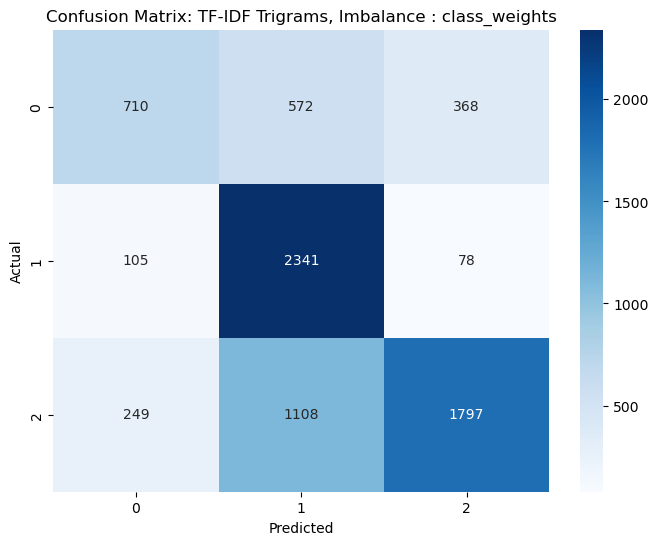

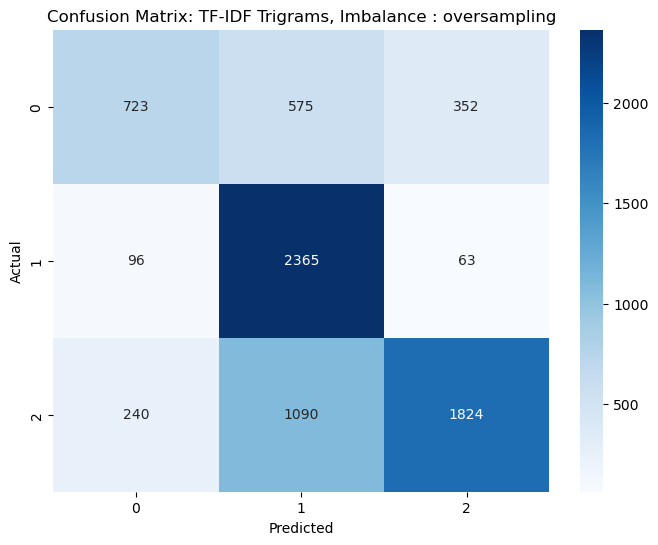

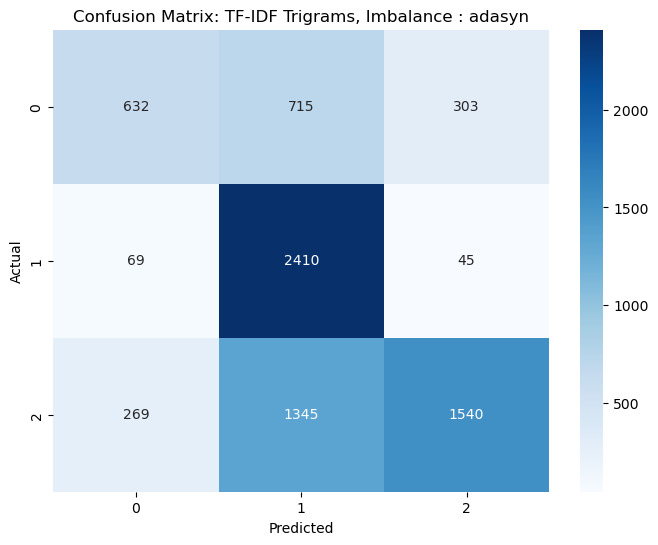

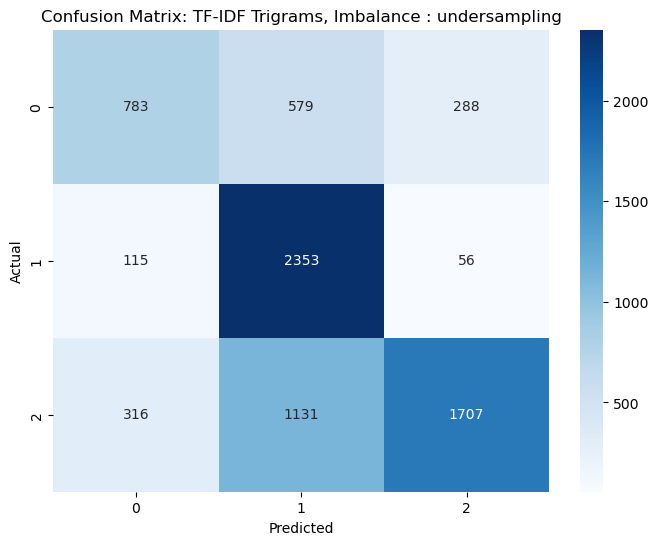

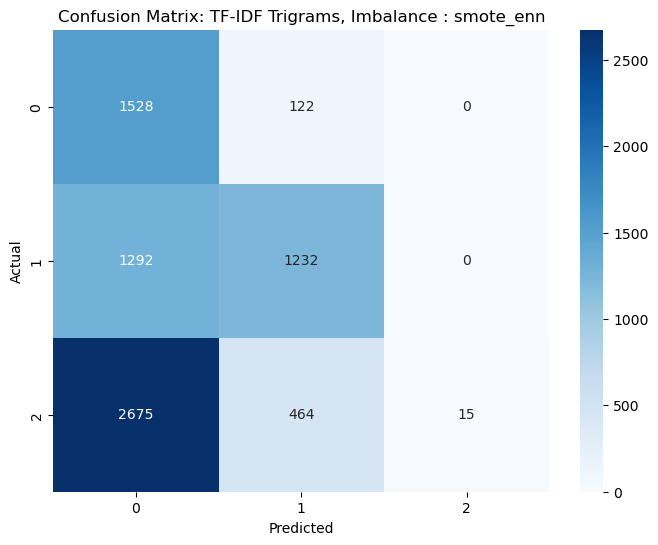

In [7]:
# Step 1: Function to run the experiment
def run_imbalanced_experiment(imbalance_method):
    ngram_range  = (1, 3)  # Trigram setting
    max_features = 10000   # Set max_features to 1000 for TF-IDF

    # Step 4: Train-test split before vectorization and resampling
    X_train, X_test, y_train, y_test = train_test_split(df['processed_comment'], df['category'], test_size=0.2, random_state=42, stratify=df['category'])

    # Step 2: Vectorization using TF-IDF, fit on training data only
    vectorizer   = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
    X_train_vec  = vectorizer.fit_transform(X_train)  # Fit on training data
    X_test_vec   = vectorizer.transform(X_test)  # Transform test data

    # Step 3: Handle class imbalance based on the selected method (only applied to the training set)
    if imbalance_method == 'class_weights':
        class_weight = 'balanced'    # Use class_weight in Random Forest
    else:
        class_weight = None          # Do not apply class_weight if using resampling

        # Resampling Techniques (only apply to the training set)
        if   imbalance_method   == 'oversampling':
            smote                = SMOTE(random_state=42)
            X_train_vec, y_train = smote.fit_resample(X_train_vec, y_train)
        elif imbalance_method   == 'adasyn':
            adasyn               = ADASYN(random_state=42)
            X_train_vec, y_train = adasyn.fit_resample(X_train_vec, y_train)
        elif imbalance_method   == 'undersampling':
            rus                  = RandomUnderSampler(random_state=42)
            X_train_vec, y_train = rus.fit_resample(X_train_vec, y_train)
        elif imbalance_method   == 'smote_enn':
            smote_enn            = SMOTEENN(random_state=42)
            X_train_vec, y_train = smote_enn.fit_resample(X_train_vec, y_train)

    # Step 5: Define and train a Random Forest model
    with mlflow.start_run() as run:
        # Set tags for the experiment and run
        mlflow.set_tag("mlflow.runName",  f"Imbalance_{imbalance_method}_RandomForest_TFIDF_Trigrams")
        mlflow.set_tag("experiment_type", "imbalance_handling")
        mlflow.set_tag("model_type",      "RandomForestClassifier")

        # Add a description
        mlflow.set_tag("description", f"RandomForest with TF-IDF Trigrams, imbalance handling method : {imbalance_method}")

        # Log vectorizer parameters
        mlflow.log_param("vectorizer_type",         "TF-IDF")
        mlflow.log_param("ngram_range",             ngram_range)
        mlflow.log_param("vectorizer_max_features", max_features)

        # Log Random Forest parameters
        n_estimators = 200
        max_depth    = 15

        mlflow.log_param("n_estimators",     n_estimators)
        mlflow.log_param("max_depth",        max_depth)
        mlflow.log_param("imbalance_method", imbalance_method)

        # Initialize and train the model
        model        = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42, class_weight=class_weight)
        model.fit(X_train_vec, y_train)

        # Step 6: Make predictions and log metrics
        y_pred       = model.predict(X_test_vec)

        # Step 5: Compute Evaluation Metrics
        accuracy           = accuracy_score       (y_test, y_pred)
        
        macro_precision    = precision_score      (y_test, y_pred, average='macro')
        macro_recall       = recall_score         (y_test, y_pred, average='macro')         # Recall or Sensitivity
        macro_F1_score     = f1_score             (y_test, y_pred, average='macro')
        macro_roc_auc      = roc_auc_score        (y_test, model.predict_proba(X_test_vec), average='macro', multi_class='ovr')
        weighted_precision = precision_score      (y_test, y_pred, average='weighted')
        weighted_recall    = recall_score         (y_test, y_pred, average='weighted')         # Recall or Sensitivity
        weighted_F1_score  = f1_score             (y_test, y_pred, average='weighted')
        weighted_roc_auc   = roc_auc_score        (y_test, model.predict_proba(X_test_vec), average='weighted', multi_class='ovr')
        
        log_loss_value     = log_loss             (y_test, model.predict_proba(X_test_vec))
        cm                 = confusion_matrix     (y_test,y_pred)
        cr                 = classification_report(y_test, y_pred)
        
        # Step 7: Log Class-wise Metrics from Classification Report
        classification_rep = classification_report(y_test, y_pred, output_dict=True)

        for label, metrics in classification_rep.items():
            clean_label = label.replace(" avg", "")  # Remove " avg" from label if present
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    mlflow.log_metric(f"{clean_label}_{metric}", value)
            else:
                mlflow.log_metric(f"{clean_label}", metrics)
        
        # Step 6: Log Remaining Metrics to MLflow
        mlflow.log_metric("log_loss",         log_loss_value)        
        mlflow.log_metric("macro_roc_auc",    macro_roc_auc)
        mlflow.log_metric("weighted_roc_auc", weighted_roc_auc)
        
        # Step 8: Plot and Log Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix: TF-IDF Trigrams, Imbalance : {imbalance_method}")
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
    
        # Step 9: saving and logging the dataset
        df.to_csv("dataset.csv", index=False)
        mlflow.log_artifact("dataset.csv")
        
        # Step 10: Log Model and Dataset
        # input_example = X_test_vec[:5]                                       # input_example provides a sample input for the model, 
                                                                             # useful for UI display and validation
        # signature     = infer_signature(X_train, model.predict(X_train_vec)) # signature defines the expected input/output schema of the model, 
                                                                             # enabling reproducibility and serving
        
        mlflow.sklearn.log_model(
                                    sk_model      = model,
                                    name          = f"RF_model_tfidf_trigrams_imbal_{imbalance_method}"
                                    # input_example = input_example,
                                    # signature     = signature
                                ) 
        # Step 11: Print Evaluation Summary
        print(f"\033[1m\033[4mEvaluation Metrics_Im-Balanced method : {imbalance_method} \033[0m : (values close to 1 represent the GOOD Model)\n")
        print(f'\tAccuracy     : {accuracy:.2f}    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions')
        print(f'\tLog Loss     : {log_loss_value:.2f}    --> Measures the performance of a classification model, Less is Good')
        print(f'\t\033[1m\033[4mMacro\033[0m  \t\t       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics')
        print(f'\t  Precision  : {macro_precision:.2f}    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions ')
        print(f'\t  Recall     : {macro_recall:.2f}    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.')
        print(f'\t  F1-Score   : {macro_F1_score:.2f}    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences')
        print(f'\t  ROC-AUC    : {macro_roc_auc:.2f}    --> Measures the ability of the model to distinguish between classes.')
        
        print(f'\t\033[1m\033[4mWeighted\033[0m  \t       --> Weighted average    : Accounts for class imbalance by weighting each class metric by its support')
        print(f'\t  Precision  : {weighted_precision:.2f}    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions ')
        print(f'\t  Recall     : {weighted_recall:.2f}    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.')
        print(f'\t  F1-Score   : {weighted_F1_score:.2f}    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences')
        print(f'\t  ROC-AUC    : {weighted_roc_auc:.2f}    --> Measures the ability of the model to distinguish between classes.')
        
        
        print(f'\nConfusion Matix      :         -->    \033[1m\033[4mORIGINAL\033[0m     \t\t\033[1m\033[4mSTANDARD\033[0m\n')
        def format_row(row):
            formatted = ' '.join(f"{val:>2}" for val in row)
            return f"[{formatted}]"
        
        for row1, row2 in zip(cm, np.flip(cm)):
            print("\t\t\t\t  ", format_row(row1), "\t       ", format_row(row2))
        
        print("\nClassification Rpt   :")
        print('\n'.join('\t\t\t\t' + line for line in cr.splitlines()))

# Run experiments for different imbalance methods
imbalance_methods = ['class_weights', 'oversampling', 'adasyn', 'undersampling', 'smote_enn']

for method in imbalance_methods:
    run_imbalanced_experiment(method)